In [1]:
!pip install AnimatedWordCloudTimelapse==1.0.8

In [2]:
token = "" #@param {type:"string"}

In [3]:
import requests
import joblib
import concurrent.futures as cf
from tqdm import tqdm

url = "https://qiita.com/api/v2/items"

header = {
  'Authorization': f'Bearer {token}'
}

def fetch_year(year):
  wordvector = {}
  page_range = 20

  # for cnt in range(5):
  #   results = []

  #   page_start = cnt * page_range + 1
  #   page_end = (cnt+1) * page_range

  #   params = []
  #   for page in range(page_start, page_end+1):
  #     params.append(
  #         [year, page, header]
  #     )

  #   results = joblib.Parallel(n_jobs=-1)(joblib.delayed(fetch_page)(year, page, header) for year, page, header in params)

  #   flag_ended = False
  #   for result in results:
  #     if len(result) == 0:
  #       flag_ended = True
  #       break

  #     for tag in result:
  #       wordvector[tag] = wordvector.get(tag, 0) + 1

  #   print(f"{year}, {page_end}")

  #   if flag_ended:
  #     break

  #skipping
  params=[]
  for page in range(1, 101, 10):
      params.append(
          [year, page, header]
      )
  results = joblib.Parallel(n_jobs=-1)(joblib.delayed(fetch_page)(year, page, header) for year, page, header in params)
  for result in results:
    for tag in result:
      wordvector[tag] = wordvector.get(tag, 0) + 1

  return wordvector

def fetch_page(year, page, header):
    tags = []

    params = {
      "page": page,
      "per_page": 100,
      "query": f"stocks:>20 created:>={year}-01 created:<{year+1}-01"
    }

    try:
      articles = requests.get(url, headers=header, params=params).json()

      for article in articles:
        for _tag in article["tags"]:
          tags.append(_tag["name"])

      return tags
    except:
      return []

timelapse = []
for year in tqdm(range(2015, 2024)):
  timelapse.append((str(year), fetch_year(year)))

100%|██████████| 9/9 [05:47<00:00, 38.65s/it]


In [7]:
import json
with open("/content/timelapse.json", "w") as f:
  json.dump(timelapse, f)

In [ ]:
ttf_raw = requests.get("https://github.com/uehara1414/japanize-matplotlib/raw/master/japanize_matplotlib/fonts/ipaexg.ttf").content

with open("/content/jap.ttf", "wb") as f:
  f.write(ttf_raw)

In [11]:
from AnimatedWordCloud import Config, animate

config = Config(
    max_words=80,
    font_path="/content/jap.ttf",
    output_path="/content/",
    movement_reluctance=100
)

animate(timelapse, config)

'/content/output.gif'

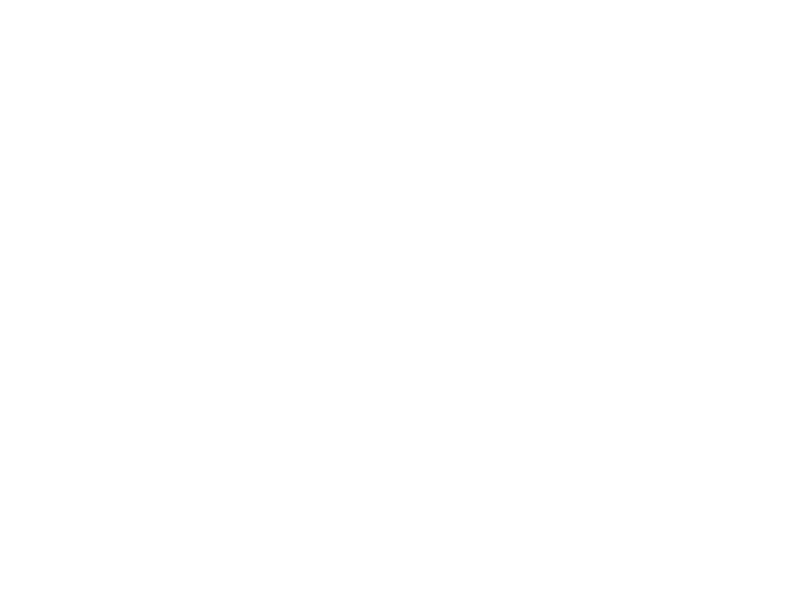

In [12]:
from IPython.display import display, Image

with open('/content/output.gif','rb') as f:
    display(Image(data=f.read(), format='png'))